### PCA - Principal Component Analysis

The problem to address is the reduction of dimensionality. A lot of times we have measurements of a system, but we don't know which of them best reflect the dynamics of the system. The goal of principal component analysis is to identify the direction, which after projecting the data onto it, saves the most variance. 

Say we have a measurement taken by a camera from three different angles. Out sample vector could be expressed as 
$$ X = \begin{bmatrix} x_A \\ y_A \\ x_B \\ y_B \\ x_C \\ y_C \end{bmatrix}$$

More formally, each vector lies in m-dimensional space spanned by some orthonormal basis. As a naive approach, our basis matrix is $$ B = \begin{bmatrix} b_1 \\ b_2 \\ ... \\ b_m \end{bmatrix}=\begin{bmatrix} 1 & 0 & ... & 0 \\ 0 & 1 & ... & 0 \\ ... \\ 0 & 0 & ... & 1 \end{bmatrix}$$ 
where each row is a basis vector with m components. Now each vector can be represented as a linear combination of basis vectors.

Now PCA asks: is there another basis which is a linear combination of the original basis, that best re-expresses our data set?

That is, we look for matrix $P$ such that $$ PX = Y $$ where Y is another matrix of size $m \times n$ (here we assume that each sample is a column, so each row is one 'feature' - later they'll become row vectors). We interpret P as a change of basis, and the row vectors of P are principal components.

The main idea in searching for P is that


In [1]:
from sklearn import datasets
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
iris.data.shape

c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(150, 4)

In [2]:
iris.get('feature_names')

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

In [4]:
iris_df = pd.DataFrame(X_train, columns=iris.get('feature_names'))
iris_df['target'] = y_train

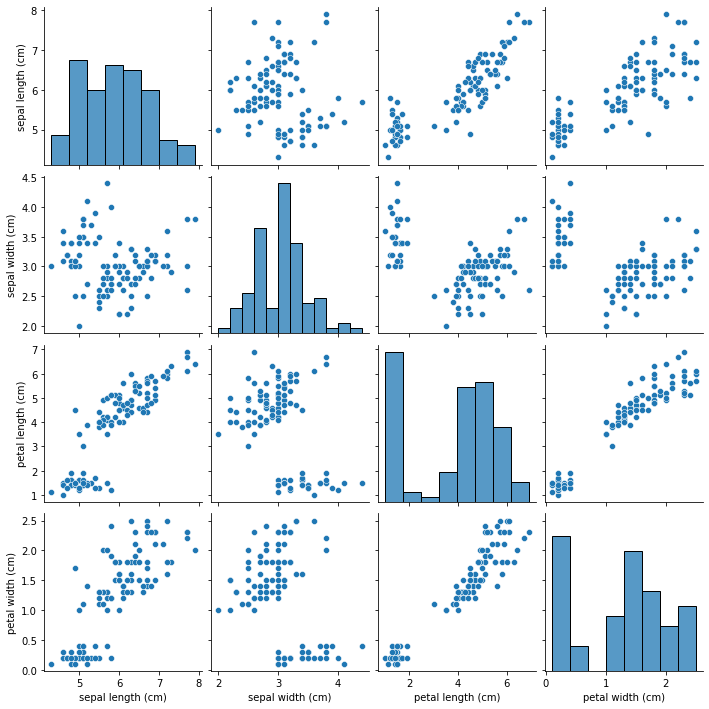

In [5]:
sns.pairplot(iris_df[iris.get('feature_names')])

We compute the correlation matrix (covariation matrix divided by corresponding std's). Large values in the off-diagonal entries suggest redundancy.

$$ Cov(X_1, X_2) = E[(X_1 - EX_1)(X_2 - EX_2)]$$

To compute covariance of matrix X of size $m \times n$ we center it around the mean and then compute $$C_X = \frac{1}{n} X^TX$$

In [6]:
iris_df[iris.get('feature_names')].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.105445,0.868468,0.815578
sepal width (cm),-0.105445,1.000000,-0.420248,-0.351558
petal length (cm),0.868468,-0.420248,1.000000,0.958864
petal width (cm),0.815578,-0.351558,0.958864,1.000000


We would like $C_Y$ to be a diagonal matrix with rank-ordering according to the variance. PCA assumes that all new basis vectors of P (rows) are orthonormal. The algorithm in multiple dimensions could proceed as follows: 
1. Select a normalized direction in m-dimensional space along which the variance of X is maximum, this will be $p_1$
2. Find another direction, however it must be orthonormal to all previously found directions
3. Repeat until m vectors are produced 

The result set of $p$ vectors are principal components. 

However, the orthonormality assumption means that there is easiest way to do it.

##### Summary of assumptions

1. Linearity
2. Large variances have important structure: encompasses the belief that data has large SNF (signal-to-noise ratio)
3. The principal components are orthogonal: enables to use linear algebra decomposition techniques

#### Solution using Eigenvector decomposition

Matrix $Y$ is of size $m \times n$

$$ C_Y = \frac{1}{n} YY^T = \frac{1}{n} (PX) (PX)^T= \frac{1}{n} PXX^TP^T = PC_XP^T$$

If we convert it to $$ P^TC_YP = C_X$$ then using the theorem that every symmetric matrix A can be diagonasied as $A = EDE^T$, where D is a diagonal matrix and E is matrix of eigenvectors of A arranged as columns, we see that E = P^T, so $$C_Y = P (P^TDP) P^T = D$$ since P is orthonormal. So as P we choose eigenvectors of $C_X = \frac{1}{n} XX^T$. Then the ith diagonal value of $C_Y$ is the variance of X along $p_i$

In [7]:
np.mean(X_train, axis=0)

array([5.88761905, 3.03904762, 3.8447619 , 1.2352381 ])

In [8]:
# First we have to center the data
X = X_train - np.mean(X_train, axis=0)
X = X.T

n = X.shape[0]
C_X = 1 / n * (X @ X.T)

eigvals, eigvec = np.linalg.eig(C_X)

Eigenvectors are arranged in order of their eigenvalues

In [9]:
print(eigvec[:, 0], eigvals[0])
print(eigvec[:, 1], eigvals[1])
print(eigvec[:, 2], eigvals[2])
print(eigvec[:, 3], eigvals[3])

[ 0.36314874 -0.08557909  0.85461429  0.36115597] 105.6244922998979
[-0.64111349 -0.74539771  0.1728101   0.05909667] 6.42290559886328
[-0.59565502  0.57391496  0.07522969  0.5569176 ] 2.0667926433547024
[ 0.31983056 -0.32814645 -0.48385079  0.74559824] 0.6915713626460305


In [15]:
X.shape

(4, 105)

In [32]:
X_three_first = X_train @ eigvec[:, :3]

It looks like we don't have any significant correlations

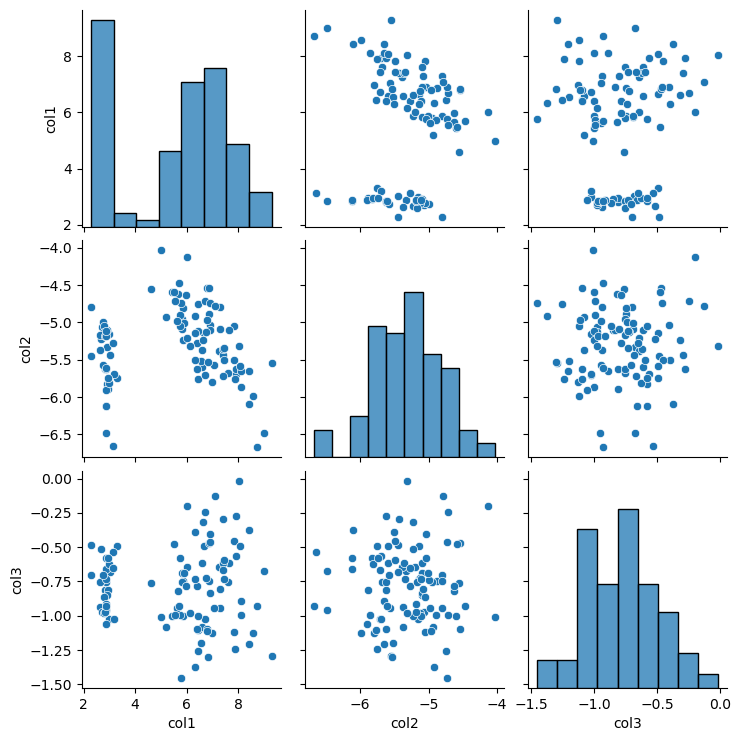

In [33]:
df_eig_dec = pd.DataFrame(X_three_first, columns=['col1', 'col2', 'col3'])
sns.pairplot(df_eig_dec)

#### Singular Value Decomposition

Another way is to use SVD decomposition. For a given matrix X, it is looking for matrices such that 
$$ X = U \Sigma V^T$$
where each column of $V$ is an eigenvector of matrix $X^TX$. 

$\Sigma$ is a matrix of size $n x m$ with few first diagonal values being equal to signular values (square roots of eigenvalues for corresponding eigenvectors of $X^TX$)

Now if we introduce new matrix $Y = \frac{1}{\sqrt(n)} X^T$, then calculating SVD of Y is will use eigenvectors of $\frac{1}{n}XX^T$ which is  a covariance matrix of X, so the singular values will be variances of X

In [52]:
X = X_train - np.mean(X_train, axis=0)
X = X.T

n = X.shape[0]

Y = X.T / np.sqrt(n)
U, S, V = np.linalg.svd(Y)
print(U.shape, V.shape)

X_svd_dec = V[:3, :] @ X
X_svd_dec.shape

(105, 105) (4, 4)


(3, 105)

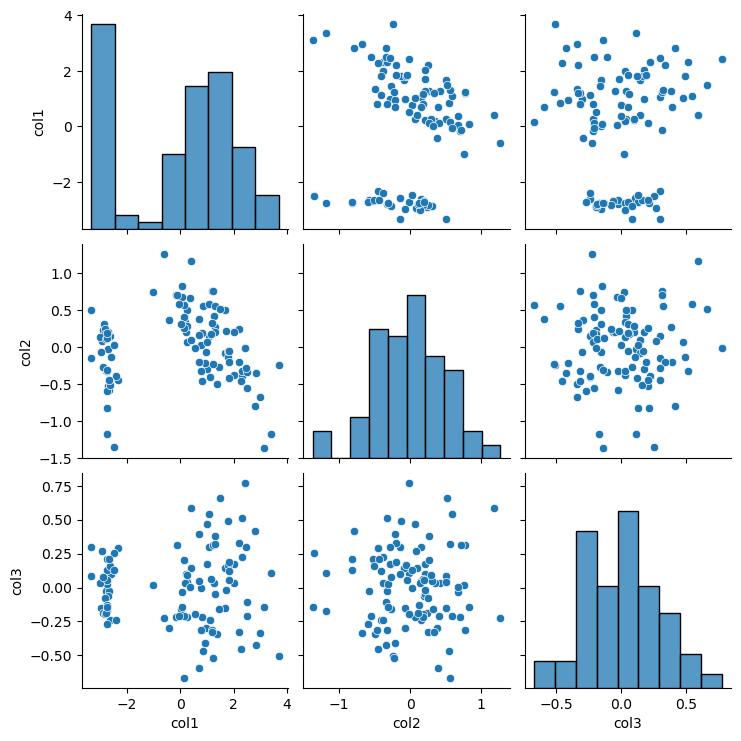

In [53]:
df_svd_dec = pd.DataFrame(X_svd_dec.T, columns=['col1', 'col2', 'col3'])
sns.pairplot(df_svd_dec)

#### Characteristics of PCA 

PCA is nonparametric, but fails with non-linear tranformations (imagine that we could use polar coordinate system). 

In [47]:
from sklearn.decomposition import PCA

x_std, y_std = np.std(X_train, axis=0), np.std(y_train)
X_train_scaled, y_train_scaled = X_train / x_std, y_train / y_std

pca = PCA(n_components=3)
pca_x = pca.fit_transform(X_train_scaled)

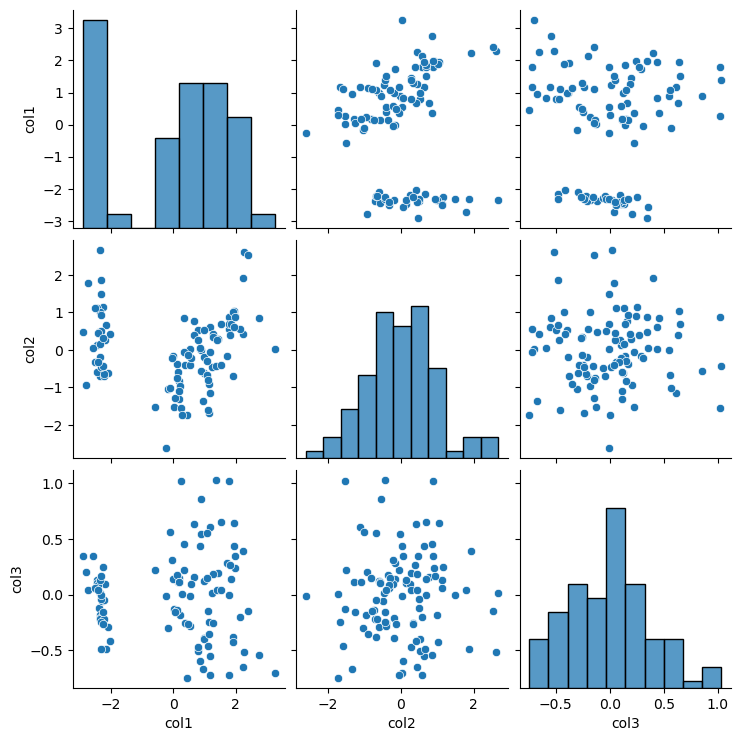

In [48]:
df_pca_dec = pd.DataFrame(pca_x, columns=['col1', 'col2', 'col3'])
sns.pairplot(df_pca_dec)